# MSP Simulation Example
# System decoupling based on Latency Insertion Method (LIM)
# Extra Task

## Sample Circuit

<img src="LIM_circuit.png" width="600" align="left">

$\Delta t=0.1ms$, $I_1=1A$, $E_{23}=1V$
<br>
$L_{12}=L_{23}=0.5mH$
<br>
$C_1=C_2=C_3=0.5mF$
<br>
$R_1=R_2=R_3=R_{12}=R_{23}=1\Omega $ 
<br>
$V_1(0)=V_2(0)=V_3(0)=0$
<br>
$I_{12}(0)=I_{23}(0)=0$ 

## Circuit and Simulation Setup

In [1]:
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(sign=' ')

# Circuit parameters:
R = 1.0
L = 0.5e-3
C = 0.5e-3
I1 = 1.0
E23 = 1

## Latency Insertion Method

In [2]:
# Incidence matrix
M = np.array([ [1,  0],
               [-1, 1],
               [0, -1]])

# Number of branches Nb and number of nodes Nn:
(Nn, Nb) = np.shape(M)

# Branches
R_b = np.array([ [R,  R]])
L_b = np.array([ [L,  L]])

# Nodes
R_n = np.array([ [R, R,  R]])
C_n = np.array([ [C,  C, C]])

### Simulation parameters 

In [3]:
# Total simulation time
T_total = 0.008
# Simulaiton time step 
Ts = 0.1e-3
# Number of simulation time steps
npoint = int(np.round(T_total/Ts))

print('Total simulation time: ' + str(T_total))
print('\nSimulation time step: ' + str(Ts))

Total simulation time: 0.008

Simulation time step: 0.0001


### Simulation loop 

In [4]:
# Current source vectors for all nodes
H = np.zeros((npoint, Nn))
H[:,0] = I1*np.ones((npoint))
# Voltage source vectors for all branches
E = np.zeros((npoint, Nb))
E[:,1] = E23*np.ones((npoint))

# Create matrix to store solution of branch currents in every simulation steps
I = np.zeros((npoint, Nb))
# Create matrix to store solution of node voltages in every simulation steps
V = np.zeros((npoint, Nn))

# Initial conditions
# Branch inductances: current = 0
I[0,:] = np.zeros((1, Nb))

# Node capacitance: voltage = 0
# Calculate V(Ts/2) based on a given initial conditions V(0)
V_0 = np.zeros((1, Nn))
for j in np.arange(0, Nn): 
    V[0,j] = (C_n[0,j]*V_0[0,j]/Ts - np.matmul(M[j,:], np.transpose(I[0,:])) + H[0,j]) / (C_n[0,j]/Ts + 1/R_n[0,j])
    
# Time loop 
for i in np.arange(1,npoint):
    # Branch loop - calculation of I(i*Ts) based on I((i-1)*Ts) and V((i-1/2)*Ts)
    for j in np.arange(0, Nb):
        I[i,j] = I[i-1,j] + Ts/L_b[0,j] * (np.matmul(np.transpose(M[:,j]), np.transpose(V[i-1,:])) - R_b[0,j] * I[i-1,j] + E[i-1,j])
        
    # Node loop - calculation of V((i+1/2)*Ts) based on I(i*Ts) and V((i-1/2)*Ts)
    for j in np.arange(0, Nn):
        V[i,j] = (C_n[0,j]*V[i-1,j]/Ts - np.matmul(M[j,:], np.transpose(I[i,:])) + H[i,j]) / (C_n[0,j]/Ts + 1/R_n[0,j])

### Results

In [5]:
print('Initialization:')
print('V1(0.05ms) = ' + str(V[0,0]))
print('V2(0.05ms) = ' + str(V[0,1]))
print('V3(0.05ms) = ' + str(V[0,2]) + '\n')

print('Branch currents at t=0.1ms:')
print('I12(0.1ms) = ' + str(I[1,0]))
print('I23(0.1ms) = ' + str(I[1,1]) + '\n')

print('Node voltages at t=0.15ms:')
print('V1(0.15ms) = ' + str(V[1,0]))
print('V2(0.15ms) = ' + str(V[1,1]))
print('V3(0.15ms) = ' + str(V[1,2]) + '\n')

print('Branch currents at t=0.2ms:')
print('I12(0.2ms) = ' + str(I[2,0]))
print('I23(0.2ms) = ' + str(I[2,1]) + '\n')

Initialization:
V1(0.05ms) = 0.16666666666666666
V2(0.05ms) = 0.0
V3(0.05ms) = 0.0

Branch currents at t=0.1ms:
I12(0.1ms) = 0.03333333333333333
I23(0.1ms) = 0.2

Node voltages at t=0.15ms:
V1(0.15ms) = 0.3
V2(0.15ms) = -0.02777777777777778
V3(0.15ms) = 0.03333333333333333

Branch currents at t=0.2ms:
I12(0.2ms) = 0.09222222222222223
I23(0.2ms) = 0.3477777777777778



### Plots

In [6]:
# Time vectors
# for branch currents
t_I = np.arange(0, npoint)*Ts
# for node voltages
t_V = (np.arange(0, npoint) + 0.5)*Ts

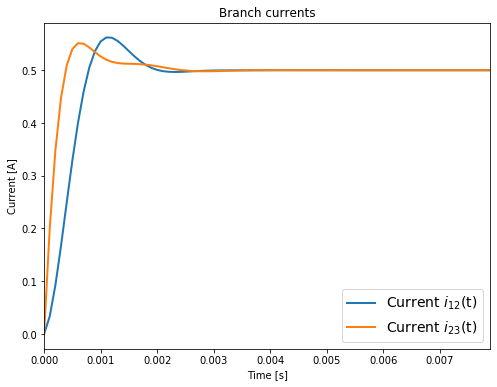

In [7]:
# Plots
plt.figure(figsize=(8,6))
plt.xlabel('Time [s]')
plt.ylabel('Current [A]')
plt.title('Branch currents')
plt.plot(t_I,I[:,0], t_I, I[:,1], linewidth=2)
plt.xlim([0, (npoint-1)*Ts])
plt.legend(['Current $i_{12}$(t)', 'Current $i_{23}$(t)'], prop={'size': 14})
plt.show()

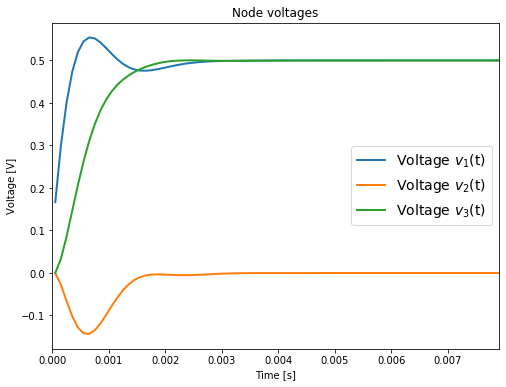

In [8]:
# Plots
plt.figure(figsize=(8,6))
plt.xlabel('Time [s]')
plt.ylabel('Voltage [V]')
plt.title('Node voltages')
plt.plot(t_V,V[:,0], t_V, V[:,1], t_V,V[:,2], linewidth=2)
plt.xlim([0, (npoint-1)*Ts])
plt.legend(['Voltage $v_{1}$(t)', 'Voltage $v_{2}$(t)', 'Voltage $v_{3}$(t)'], prop={'size': 14})
plt.show()